## Get Requirements

In [1]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim
import numpy as np
import matplotlib.pyplot as plt
import h5py
from pathlib import Path
import torch
from torch.utils import data
import math
import random
from torch.utils.data import Dataset, DataLoader
import time
import glob
import scipy.signal
import os
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
print(torch.__version__)

/home/jovyan/conda-envs/sleep_monitoring/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.10.0


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device 

device(type='cuda')

### Neptune (Ignore this block)

In [5]:
import neptune.new as neptune

run = neptune.init(
    project="jathurshan0330/V2-Cros",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJmYmRmNjE0Zi0xMDRkLTRlNzUtYmIxNi03NzM2ODBlZDc5NTMifQ==",
)  # your credentials


KeyboardInterrupt: 

In [6]:
 experiment = "V2-Cros-76"   #Change This
 !mkdir "/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/V2-Cros-76"  # Change This

## Data

In [4]:
from datasets.sleep_edf import split_data, SleepEDF_MultiChan_Dataset

In [5]:
train_data_list = [0,1,2,3]  #4
val_data_list = [4]  #4
data_path = "/home/mmsm/Sleep_EDF_Dataset"

eeg_list = glob.glob(f'{data_path}/x*.h5')
eeg_list.sort()
[train_eeg_list, val_eeg_list] = split_data(eeg_list,train_data_list,val_data_list)
print(train_eeg_list)
print(val_eeg_list)

mean_eeg_list = glob.glob(f'{data_path}/mean*.h5')
mean_eeg_list.sort()
[train_mean_eeg_list, val_mean_eeg_list] = split_data(mean_eeg_list,train_data_list,val_data_list)
print(train_mean_eeg_list)
print(val_mean_eeg_list)

sd_eeg_list = glob.glob(f'{data_path}/std*.h5')
sd_eeg_list.sort()
[train_sd_eeg_list, val_sd_eeg_list] = split_data(sd_eeg_list,train_data_list,val_data_list)
print(train_sd_eeg_list)
print(val_sd_eeg_list)

#########################################################################################################################

eog_list = glob.glob(f'{data_path}/eog*.h5')
eog_list.sort()
[train_eog_list, val_eog_list] = split_data(eog_list,train_data_list,val_data_list)
print(train_eog_list)
print(val_eog_list)

mean_eog_list = glob.glob(f'{data_path}/eog_m*.h5')
mean_eog_list.sort()
[train_mean_eog_list, val_mean_eog_list] = split_data(mean_eog_list,train_data_list,val_data_list)
print(train_mean_eog_list)
print(val_mean_eog_list)

sd_eog_list = glob.glob(f'{data_path}/eog_s*.h5')
sd_eog_list.sort()
[train_sd_eog_list, val_sd_eog_list] = split_data(sd_eog_list,train_data_list,val_data_list)
print(train_sd_eog_list)
print(val_sd_eog_list)


label_list = glob.glob(f'{data_path}/y*.h5')
label_list.sort()
[train_label_list, val_label_list] = split_data(label_list,train_data_list,val_data_list)
print(train_label_list)
print(val_label_list)


['/home/mmsm/Sleep_EDF_Dataset/x1.h5' '/home/mmsm/Sleep_EDF_Dataset/x2.h5'
 '/home/mmsm/Sleep_EDF_Dataset/x3.h5' '/home/mmsm/Sleep_EDF_Dataset/x4.h5']
['/home/mmsm/Sleep_EDF_Dataset/x5.h5']
['/home/mmsm/Sleep_EDF_Dataset/mean1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/mean2.h5'
 '/home/mmsm/Sleep_EDF_Dataset/mean3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/mean4.h5']
['/home/mmsm/Sleep_EDF_Dataset/mean5.h5']
['/home/mmsm/Sleep_EDF_Dataset/std1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/std2.h5'
 '/home/mmsm/Sleep_EDF_Dataset/std3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/std4.h5']
['/home/mmsm/Sleep_EDF_Dataset/std5.h5']
['/home/mmsm/Sleep_EDF_Dataset/eog1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog2.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog4.h5']
['/home/mmsm/Sleep_EDF_Dataset/eog5.h5']
['/home/mmsm/Sleep_EDF_Dataset/eog_m1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog_m2.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog_m3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog_m4.h5']
['/home/mmsm/Sleep_EDF_Dataset

In [6]:
train_dataset = SleepEDF_MultiChan_Dataset(eeg_file = train_eeg_list , 
                                           eog_file = train_eog_list, 
                                           label_file = train_label_list, 
                                           device = device, mean_eeg_l = train_mean_eeg_list, sd_eeg_l = train_sd_eeg_list, 
                                           mean_eog_l = train_mean_eog_list, sd_eog_l = train_sd_eog_list, 
                                           sub_wise_norm = True, 
                                           transform=transforms.Compose([
                                               transforms.ToTensor(),
                                                ]) )

val_dataset = SleepEDF_MultiChan_Dataset(eeg_file = val_eeg_list ,
                                         eog_file = val_eog_list, 
                                         label_file = val_label_list, 
                                         device = device, mean_eeg_l = val_mean_eeg_list, sd_eeg_l = val_sd_eeg_list,
                                         mean_eog_l = val_mean_eog_list, sd_eog_l = val_sd_eog_list,
                                         sub_wise_norm = True,
                                         transform=transforms.Compose([
                                               transforms.ToTensor(),
                                                ]) )

Reading from /home/mmsm/Sleep_EDF_Dataset/x1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['x']>
Number of samples : 43754
Shape of each data : (43754, 1, 3000)
Reading from /home/mmsm/Sleep_EDF_Dataset/eog1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['eog']>
Number of samples : 43754
Shape of each data : (43754, 1, 3000)
Reading from /home/mmsm/Sleep_EDF_Dataset/y1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['y']>
Number of samples : 43754
Shape of each data : (43754,)
Reading from /home/mmsm/Sleep_EDF_Dataset/x2.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['x']>
Number of samples : 40155
Shape of each data : (40155, 1, 3000)
Reading from /home/mmsm/Sleep_EDF_Dataset/eog2.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['eog']>
Number of samp

In [7]:
batch_size = 64
train_data_loader = data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_data_loader = data.DataLoader(val_dataset, batch_size = 32, shuffle = True)

EEG batch shape: torch.Size([64, 1, 1, 3000])
EOG batch shape: torch.Size([64, 1, 1, 3000])
Labels batch shape: torch.Size([64])


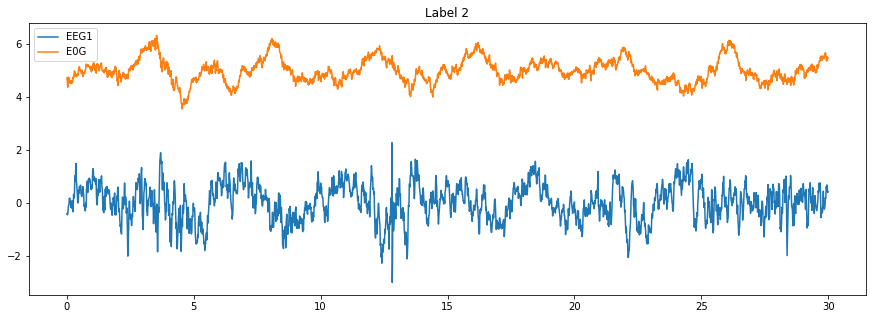

EEG batch shape: torch.Size([32, 1, 1, 3000])
EOG batch shape: torch.Size([32, 1, 1, 3000])
Labels batch shape: torch.Size([32])


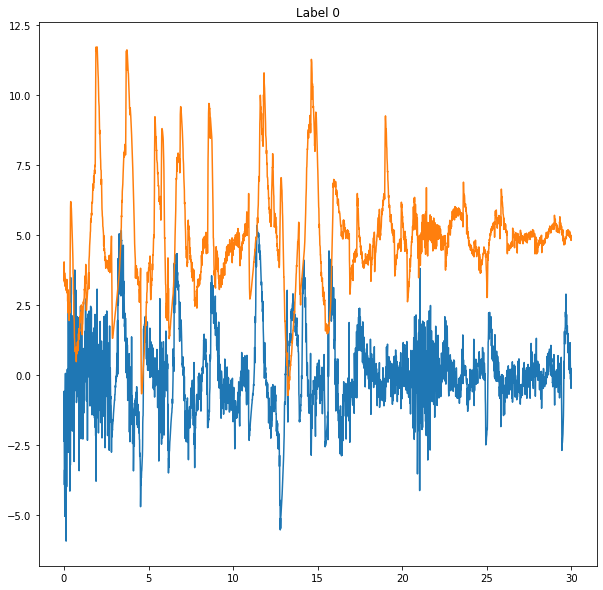

EEG Minimum :-9.192940157732014
EEG Maximum :10.77732805618428
EOG Minimum :-10.468892898599714
EOG Maximum :9.615761798167151
EEG Mean :-0.003055788606435609
EEG Standard Deviation :1.0504648735205828
EOG Mean :-0.0035501834147438393
EOG Standard Deviation :1.1450482758150151


In [8]:
eeg_data, eog_data, label = next(iter(train_data_loader))
print(f"EEG batch shape: {eeg_data.size()}")
print(f"EOG batch shape: {eog_data.size()}")
print(f"Labels batch shape: {label.size()}")

t = np.arange(0,30,1/100)
plt.figure(figsize = (15,5))
plt.plot(t,eeg_data[0].squeeze(),label="EEG1")
plt.plot(t,eog_data[0].squeeze()+5,label="E0G")
plt.title(f"Label {label[0].squeeze()}")
plt.legend()
plt.show()


eeg_data, eog_data, label = next(iter(val_data_loader))
print(f"EEG batch shape: {eeg_data.size()}")
print(f"EOG batch shape: {eog_data.size()}")
print(f"Labels batch shape: {label.size()}")

t = np.arange(0,30,1/100)
plt.figure(figsize = (10,10))
plt.plot(t,eeg_data[0].squeeze())
plt.plot(t,eog_data[0].squeeze()+5)
plt.title(f"Label {label[0].squeeze()}")
plt.show()


print(f"EEG Minimum :{eeg_data.min()}")
print(f"EEG Maximum :{eeg_data.max()}")
print(f"EOG Minimum :{eog_data.min()}")
print(f"EOG Maximum :{eog_data.max()}")


print(f"EEG Mean :{torch.mean(eeg_data)}")
print(f"EEG Standard Deviation :{torch.std(eeg_data)}")
print(f"EOG Mean :{torch.mean(eog_data)}")
print(f"EOG Standard Deviation :{torch.std(eog_data)}")



### Classification Model Cross Transformer

In [9]:
# import copy
# from typing import Optional, Any

# import torch
# from torch import Tensor
# from torch.nn import functional as F
# from torch.nn import Module
# from torch.nn import MultiheadAttention
# from torch.nn import ModuleList
# from torch.nn.init import xavier_uniform_
# from torch.nn import Dropout
# from torch.nn import Linear
# from torch.nn import LayerNorm, BatchNorm1d

from models.model_blocks import PositionalEncoding, Window_Embedding, Intra_modal_atten, Cross_modal_atten, Feed_forward
from models.epoch_cmt import Epoch_Cross_Transformer_Network
from models.sequence_cmt import Seq_Cross_Transformer_Network 

### Model Training

In [10]:
import torch.optim as optim

d_model = 256 
dim_feedforward=1024 
window_size = 50
Net = Epoch_Cross_Transformer_Network(d_model = d_model, dim_feedforward=dim_feedforward,
                                window_size = window_size ).to(device)
# Net = torch.load("/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/Pretraining/VCROSPRE-23/Net_2_best_loss1.pth.tar")

lr = 0.001
beta_1 =  0.9    
beta_2 =  0.999    
eps = 1e-9
n_epochs = 1000
weights = torch.tensor([1., 2., 1., 2., 2.])
print(f"weights: {weights}")
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(Net.parameters(), lr=lr, betas=(beta_1, beta_2),eps = eps, weight_decay = 0.0001)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.5) 
pred,cls_outs,feat_list = Net(eeg_data.float().to(device), eog_data.float().to(device),finetune = True)
print(pred.shape,cls_outs.shape,len(feat_list))

NameError: name 'Rearrange' is not defined

In [ ]:
Net

In [ ]:
# this is for Neptune
parameters = {
    "Experiment" : " (With Pretraining) V2 Cross Modal Transformer",
    'Model Type' : "Each channel encoded using cnn1d, then cross transformer, then one MLP",# separate MLPs with dropout for wake and sleep",
    'd_model' : d_model,
    'dim_feedforward' : dim_feedforward,
    'window_size ':window_size ,
    'Batch Size': batch_size,
    'Loss': f"Weighted Categorical Loss,{weights}",  # Check this every time
    'Optimizer' : "Adam",        # Check this every time   
    'Learning Rate': lr,
    'eps' : eps,
    "LR Schduler": "StepLR",
    'Beta 1': beta_1,
    'Beta 2': beta_2,
    'n_epochs': n_epochs,
    'val_set' : val_data_list[0]+1,
    'threshold': 0.5
}
run['model/parameters'] = parameters
run['model/model_architecture'] = Net

### Metrics

In [11]:
from torch.autograd import Variable
from sklearn.metrics import cohen_kappa_score

def accuracy(outputs, labels):
    # m = nn.Softmax(dim=1) #########
    # outputs = m(outputs)   ########
    # print(sum(outputs[0,:]))
    pred = torch.argmax(outputs, 1)
    # print(pred)
    correct = pred.eq(labels.view_as(pred)).sum().item()
    total = int(labels.shape[0])
    return correct / total

def kappa(output, label):  
  # m = nn.Softmax(dim=1) #########
  # output = m(output)   ########
  preds = torch.argmax(output, 1)
  # y_true = y_targets.cpu().numpy()
  # y_pred = y_preds.cpu().numpy()
  return cohen_kappa_score(label, preds)


# def sensitivity(outputs, labels):
#     #tp/tp+fn
#     t = Variable(torch.Tensor([0.5]))  # threshold
#     preds = (outputs > t).float() * 1
#     tp = torch.sum(preds*labels == 1)
#     fn = torch.sum((abs(preds-1))*labels==1)
#     # print(preds)
#     return tp/(tp+fn) if (tp+fn)!=0 else 0

# def specificity(outputs, labels):
#     #tn/tn+fp
#     t = Variable(torch.Tensor([0.5]))  # threshold
#     preds = (outputs > t).float() * 1
#     tn = torch.sum((abs(preds-1))*(abs(labels-1)) == 1)
#     fp = torch.sum(preds*(abs(labels-1)) ==1)
#     # print(preds)
#     return tn/(tn+fp) if (tn+fp)!=0 else 0

def g_mean(sensitivity, specificity):
    return (sensitivity*specificity)**0.5

In [12]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap,vmin =100 ,vmax = 15000)
    plt.title(title,fontsize = 20)
    # plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, fontsize = 15)
        plt.yticks(tick_marks, target_names,fontsize = 15)

    if normalize:
        cm2 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 3 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:,}\n{:0.2f}%".format(int(cm[i, j]),cm2[i, j]*100),
                     horizontalalignment="center", verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 13)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label',fontsize = 18)
    plt.xlabel('Predicted label',fontsize = 18)#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [13]:
# batch_size = 10 # nb_samples
# n_classes = 4
output = torch.randn(batch_size,5) # refer to output after softmax
lab = torch.randint(0, 5, (batch_size,)) # labels
#print(label)


def confusion_matrix(output, label, n_classes, batch_size, print_conf_mat = False):
    # m = nn.Softmax(dim=1) #########
    # output = m(output)   ########
    preds = torch.argmax(output, 1)
    # print(preds)
    # print(label)
    conf_matrix = torch.zeros(n_classes, n_classes)
    avg_sensitivity = 0
    avg_specificity = 0
    avg_F1_score = 0
    avg_precision = 0
    sens_list = []
    spec_list = []
    F1_list = []
    precision_list = []

    for p, t in zip(preds, label):
        conf_matrix[p, t] += 1
    if print_conf_mat==True:    ##Jathu made this edit
      print(conf_matrix)

      plot_confusion_matrix(cm = conf_matrix.cpu().numpy(),
                      normalize    = True,
                      target_names = ['Wake', 'N1', 'N2','N3','REM'],
                      title        = "Confusion Matrix (5-Class)")
      # plt.figure(figsize=(8, 6))
      # plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
      # plt.title('Confusion Matrix')
      # plt.colorbar()
      # fig, ax = plt.subplots(figsize=(7.5, 7.5))
      # ax.matshow(conf_matrix, cmap=plt.get_cmap('Blues'), alpha=1)
      # for i in range(conf_matrix.shape[0]):
      #     for j in range(conf_matrix.shape[1]):
      #         ax.text(x=j, y=i,s=int(conf_matrix[i, j]), va='center', ha='center', size='xx-large')
 
      # plt.xlabel('Prediction', fontsize=18)
      # plt.ylabel('Ground Truth', fontsize=18)
      # plt.title('Confusion Matrix', fontsize=18)
      # plt.colorbar()
      plt.show()

    TP = conf_matrix.diag()
    for c in range(n_classes):
        idx = torch.ones(n_classes).byte()
        idx[c] = 0
        TN = conf_matrix[idx.nonzero()[:,None], idx.nonzero()].sum()
        FP = conf_matrix[c, idx].sum()
        FN = conf_matrix[idx, c].sum()

        if (TP[c]+FN) != 0:
          sensitivity = (TP[c] / (TP[c]+FN))
        else:
          sensitivity = 0

        if (TN+FP) != 0:
          specificity = (TN / (TN+FP))
        else:
          specificity = 0

        if ((2*TP[c]) + (FN + FP)) !=0:
          F1_score = (2*TP[c])/((2*TP[c]) + (FN + FP))
        else:
          F1_score = 0
        
        if (TP[c]+FP) !=0:
          precision = (TP[c]/(TP[c]+FP))
        else:
          precision = 0


        sens_list.append(float(sensitivity))
        spec_list.append(float(specificity))
        F1_list.append(float(F1_score))
        precision_list.append(float(precision))

        avg_sensitivity += float(sensitivity)
        avg_specificity += float(specificity)
        avg_F1_score += float(F1_score)
        avg_precision +=float(precision)

        # print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(c, TP[c], TN, FP, FN))
        # print('Sensitivity = {}'.format(sensitivity))
        # print('Specificity = {}'.format(specificity))
    return sens_list, spec_list,F1_list, precision_list, avg_sensitivity/5, avg_specificity/5, avg_F1_score/5, avg_precision/5 

confusion_matrix(output, lab,5,batch_size)

/tmp/ipykernel_2239551/3130117389.py:54: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272164809/work/aten/src/ATen/native/IndexingUtils.h:30.)
  FP = conf_matrix[c, idx].sum()
/tmp/ipykernel_2239551/3130117389.py:55: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272164809/work/aten/src/ATen/native/IndexingUtils.h:30.)
  FN = conf_matrix[idx, c].sum()


([0.2142857164144516, 0.0833333358168602, 0.125, 0.0, 0.3333333432674408],
 [0.9200000166893005,
  0.7692307829856873,
  0.7291666865348816,
  0.75,
  0.8260869383811951],
 [0.2857142984867096, 0.07999999821186066, 0.12903225421905518, 0.0, 0.375],
 [0.4285714328289032,
  0.07692307978868484,
  0.13333334028720856,
  0.0,
  0.4285714328289032],
 0.15119047909975053,
 0.7988968849182129,
 0.17394931018352508,
 0.21347985714673995)

In [14]:
# output = torch.randn(5, 4)
# print(output)
# labels = torch.randint(0, 4, (5,))
# print(labels)
# print(accuracy(output, labels))
# print(kappa(output, labels))
# # pred = torch.argmax(output, 1)
# # print(pred)

# # correct = pred.eq(labels.view_as(pred)).sum().item()
# # print(correct)
# # print(sensitivity(a, b))
# # print(specificity(a, b))

### Training

In [15]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count if self.count != 0 else 0

In [42]:
# Training the model
import warnings
warnings.filterwarnings("ignore")

best_val_acc = 0
best_val_kappa = 0
for epoch_idx in range(n_epochs):  # loop over the dataset multiple times
    run['train/epoch/learning_Rate'].log(optimizer.param_groups[0]["lr"]) 
    Net.train()
    print(f'===========================================================Training Epoch : [{epoch_idx+1}/{n_epochs}] ===========================================================================================================>')
    batch_time = AverageMeter()
    data_time = AverageMeter()
    
    losses = AverageMeter()
    val_losses = AverageMeter()
    
    train_accuracy = AverageMeter()
    val_accuracy = AverageMeter()

    train_sensitivity = AverageMeter()
    val_sensitivity = AverageMeter()
    
    train_specificity = AverageMeter()
    val_specificity = AverageMeter()

    train_gmean = AverageMeter()
    val_gmean = AverageMeter()

    train_kappa = AverageMeter()
    val_kappa = AverageMeter()

    train_f1_score = AverageMeter()
    val_f1_score = AverageMeter()

    train_precision = AverageMeter()
    val_precision = AverageMeter()

    class1_sens = AverageMeter()
    class2_sens = AverageMeter()
    class3_sens = AverageMeter()
    class4_sens = AverageMeter()
    class5_sens = AverageMeter()

    class1_spec = AverageMeter()
    class2_spec = AverageMeter()
    class3_spec = AverageMeter()
    class4_spec = AverageMeter()
    class5_spec = AverageMeter()

    class1_f1 = AverageMeter()
    class2_f1 = AverageMeter()
    class3_f1 = AverageMeter()
    class4_f1 = AverageMeter()
    class5_f1 = AverageMeter()

    end = time.time()

    for batch_idx, data_input in enumerate(train_data_loader):
        # get the inputs; data is a list of [inputs, labels]
        data_time.update(time.time() - end)
        eeg,eog, labels = data_input
        cur_batch_size = len(eeg)
        
        # print(np.bincount(labels.numpy()))
        # print(cur_batch_size)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs,_,_ = Net(eeg.float().to(device), eog.float().to(device),finetune = True)

        ####logit long tail###
        # print(outputs[0])
        # outputs = outputs + logit_adjustments
        # print(outputs[0])
        # print(outputs.shape, labels.shape)
        loss = criterion(outputs.cpu(), labels)#.to(device))
        
        # loss_r = 0
        # for parameter in Net.parameters():
        #     loss_r += torch.sum(parameter ** 2)


        # loss = loss + 0.0001 * loss_r

        loss.backward()
        optimizer.step()
        # scheduler.step()
        
        losses.update(loss.data.item())
        train_accuracy.update(accuracy(outputs.cpu(), labels))

        _,_,_,_,sens,spec,f1, prec = confusion_matrix(outputs.cpu(), labels, 5, cur_batch_size)
        train_sensitivity.update(sens)
        train_specificity.update(spec)
        train_f1_score.update(f1)
        train_precision.update(prec)
        train_gmean.update(g_mean(sens, spec))
        train_kappa.update(kappa(outputs.cpu(), labels))
        
        run['train/epoch/batch_loss'].log(losses.val)     #1
        run['train/epoch/batch_accuracy'].log(train_accuracy.val)
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()


        if batch_idx % 1000 == 0:
            
            msg = 'Epoch: [{0}/{3}][{1}/{2}]\t' \
                  'Train_Loss {loss.val:.5f} ({loss.avg:.5f})\t'\
                  'Train_Acc {train_acc.val:.5f} ({train_acc.avg:.5f})\t'\
                  'Train_G-Mean {train_gmean.val:.5f}({train_gmean.avg:.5f})\t'\
                  'Train_Kappa {train_kap.val:.5f}({train_kap.avg:.5f})\t'\
                  'Train_MF1 {train_mf1.val:.5f}({train_mf1.avg:.5f})\t'\
                  'Train_Precision {train_prec.val:.5f}({train_prec.avg:.5f})\t'\
                  'Train_Sensitivity {train_sens.val:.5f}({train_sens.avg:.5f})\t'\
                  'Train_Specificity {train_spec.val:.5f}({train_spec.avg:.5f})\t'\
                  'Time {batch_time.val:.3f}s ({batch_time.avg:.3f}s)\t' \
                  'Speed {speed:.1f} samples/s\t' \
                  'Data {data_time.val:.3f}s ({data_time.avg:.3f}s)\t'.format(
                      epoch_idx+1, batch_idx, len(train_data_loader),n_epochs, batch_time=batch_time,
                      speed=data_input[0].size(0)/batch_time.val,
                      data_time=data_time, loss=losses, train_acc = train_accuracy,
                      train_sens =train_sensitivity, train_spec = train_specificity, train_gmean = train_gmean,
                      train_kap = train_kappa, train_mf1 = train_f1_score, train_prec = train_precision)
            print(msg)


    #evaluation
    with torch.no_grad():
      Net.eval()
      for batch_val_idx, data_val in enumerate(val_data_loader):
        val_eeg,val_eog, val_labels = data_val
        cur_val_batch_size = len(val_eeg)
        pred,_,_ = Net(val_eeg.float().to(device), val_eog.float().to(device),finetune = True)
        ####Long tail logi adjustment
        # pred = pred - logit_adjustments
        val_loss = criterion(pred.cpu(), val_labels)#.to(device))
        val_losses.update(val_loss.data.item())
        val_accuracy.update(accuracy(pred.cpu(), val_labels))

        sens_list,spec_list,f1_list,prec_list, sens,spec,f1,prec = confusion_matrix(pred.cpu(), val_labels,  5, cur_val_batch_size)
        val_sensitivity.update(sens)
        val_specificity.update(spec)
        val_f1_score.update(f1)
        val_precision.update(prec)
        val_gmean.update(g_mean(sens, spec))
        val_kappa.update(kappa(pred.cpu(), val_labels))

        class1_sens.update(sens_list[0])
        class2_sens.update(sens_list[1])
        class3_sens.update(sens_list[2])
        class4_sens.update(sens_list[3])
        class5_sens.update(sens_list[4])

        class1_spec.update(spec_list[0])
        class2_spec.update(spec_list[1])
        class3_spec.update(spec_list[2])
        class4_spec.update(spec_list[3])
        class5_spec.update(spec_list[4])

        class1_f1.update(f1_list[0])
        class2_f1.update(f1_list[1])
        class3_f1.update(f1_list[2])
        class4_f1.update(f1_list[3])
        class5_f1.update(f1_list[4])

      print(batch_val_idx)

     

      print(f'===========================================================Epoch : [{epoch_idx+1}/{n_epochs}]  Evaluation ===========================================================================================================>')
      print("Training Results : ")
      print(f"Training Loss     : {losses.avg}, Training Accuracy      : {train_accuracy.avg}, Training G-Mean      : {train_gmean.avg}") 
      print(f"Training Kappa      : {train_kappa.avg},Training MF1     : {train_f1_score.avg}, Training Precision      : {train_precision.avg}, Training Sensitivity      : {train_sensitivity.avg}, Training Specificity      : {train_specificity.avg}")
      
      print("Validation Results : ")
      print(f"Validation Loss   : {val_losses.avg}, Validation Accuracy : {val_accuracy.avg}, Validation G-Mean      : {val_gmean.avg}") 
      print(f"Validation Kappa     : {val_kappa.avg}, Validation MF1      : {val_f1_score.avg}, Validation Precision      : {val_precision.avg},  Validation Sensitivity      : {val_sensitivity.avg}, Validation Specificity      : {val_specificity.avg}")
    

      print(f"Class wise sensitivity W: {class1_sens.avg}, S1: {class2_sens.avg}, S2: {class3_sens.avg}, S3: {class4_sens.avg}, R: {class5_sens.avg}")
      print(f"Class wise specificity W: {class1_spec.avg}, S1: {class2_spec.avg}, S2: {class3_spec.avg}, S3: {class4_spec.avg}, R: {class5_spec.avg}")
      print(f"Class wise F1  W: {class1_f1.avg}, S1: {class2_f1.avg}, S2: {class3_f1.avg}, S3: {class4_f1.avg}, R: {class5_f1.avg}")

      run['train/epoch/epoch_train_loss'].log(losses.avg)
      run['train/epoch/epoch_val_loss'].log(val_losses.avg)

      run['train/epoch/epoch_train_accuracy'].log(train_accuracy.avg)
      run['train/epoch/epoch_val_accuracy'].log(val_accuracy.avg)

      run['train/epoch/epoch_train_sensitivity'].log(train_sensitivity.avg)
      run['train/epoch/epoch_val_sensitivity'].log(val_sensitivity.avg)

      run['train/epoch/epoch_train_specificity'].log(train_specificity.avg)
      run['train/epoch/epoch_val_specificity'].log(val_specificity.avg)

      run['train/epoch/epoch_train_G-Mean'].log(train_gmean.avg)
      run['train/epoch/epoch_val_G-Mean'].log(val_gmean.avg)

      run['train/epoch/epoch_train_Kappa'].log(train_kappa.avg)
      run['train/epoch/epoch_val_Kappa'].log(val_kappa.avg)

      run['train/epoch/epoch_train_MF1 Score'].log(train_f1_score.avg)
      run['train/epoch/epoch_val_MF1 Score'].log(val_f1_score.avg)

      run['train/epoch/epoch_train_Precision'].log(train_precision.avg)
      run['train/epoch/epoch_val_Precision'].log(val_precision.avg)

      #################################
      
      run['train/epoch/epoch_val_Class wise sensitivity W'].log(class1_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S1'].log(class2_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S2'].log(class3_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S3'].log(class4_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity R'].log(class5_sens.avg)

      run['train/epoch/epoch_val_Class wise specificity W'].log(class1_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S1'].log(class2_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S2'].log(class3_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S3'].log(class4_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity R'].log(class5_spec.avg)

      run['train/epoch/epoch_val_Class wise F1 Score W'].log(class1_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S1'].log(class2_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S2'].log(class3_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S3'].log(class4_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score R'].log(class5_f1.avg)

      if val_accuracy.avg > best_val_acc or (epoch_idx+1)%100==0 or val_kappa.avg > best_val_kappa:
          if val_accuracy.avg > best_val_acc:
            run['model/bestmodel_acc'].log(epoch_idx+1)
            best_val_acc = val_accuracy.avg
            print("================================================================================================")
            print("                                          Saving Best Model (ACC)                                     ")
            print("================================================================================================")
            torch.save(Net, f'/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/{experiment}/checkpoint_model_best_acc.pth.tar')
          if val_kappa.avg > best_val_kappa:
            run['model/bestmodel_kappa'].log(epoch_idx+1)
            best_val_kappa = val_kappa.avg
            print("================================================================================================")
            print("                                          Saving Best Model (Kappa)                                    ")
            print("================================================================================================")
            torch.save(Net, f'/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/{experiment}/checkpoint_model_best_kappa.pth.tar')
          run['model/best_acc'].log(val_accuracy.avg)
          run['model/best_kappa'].log(val_kappa.avg)
          if (epoch_idx+1)%50==0:
            torch.save(Net, f'/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/{experiment}/checkpoint_model_epoch_{epoch_idx+1}.pth.tar')
    lr_scheduler.step()
         
print('========================================Finished Training ===========================================')

===========================================================Training Epoch : [1/1000] ===========================================================================================================>
tensor([ 1.7231, -0.7377, -1.5658,  1.3054, -0.5017], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([ 0.6442, -2.9630, -2.6113, -1.3870, -2.5211], device='cuda:0',
       dtype=torch.float64, grad_fn=<SelectBackward0>)
Epoch: [1/1000][0/4991]	Train_Loss 1.51003 (1.51003)	Train_Acc 0.56250 (0.56250)	Train_G-Mean 0.60077(0.60077)	Train_Kappa 0.39704(0.39704)	Train_MF1 0.41640(0.41640)	Train_Precision 0.45315(0.45315)	Train_Sensitivity 0.40889(0.40889)	Train_Specificity 0.88270(0.88270)	Time 0.056s (0.056s)	Speed 570.7 samples/s	Data 0.014s (0.014s)	
tensor([-0.6794,  1.2003,  0.6966, -1.7014,  0.5239], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([-1.7583, -1.0250, -0.3489, -4.3938, -1.4955], device='cuda:0',
       dtype=torch.float64, grad_fn=<SelectBackward0>)
tensor([-

KeyboardInterrupt: 

In [ ]:
print("finished Training")

### Evaluation

In [45]:
# test_model = Cross_Transformer_Network().to(device)
test_model = torch.load('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/V2-Cros-64/checkpoint_model_best_kappa.pth.tar')
test_model.eval()

Cross_Transformer_Network(
  (eeg_atten): Intra_modal_atten(
    (window_embed): Window_Embedding(
      (projection_1): Sequential(
        (0): Conv1d(1, 64, kernel_size=(50,), stride=(50,))
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (projection_2): Sequential(
        (0): Conv1d(1, 32, kernel_size=(5,), stride=(5,))
        (1): LeakyReLU(negative_slope=0.01)
        (2): Conv1d(32, 64, kernel_size=(5,), stride=(5,))
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv1d(64, 96, kernel_size=(2,), stride=(2,))
        (5): LeakyReLU(negative_slope=0.01)
        (6): BatchNorm1d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (projection_3): Sequential(
        (0): Conv1d(1, 64, kernel_size=(25,), stride=(25,))
        (1): LeakyReLU(negative_slope=0.01)
        (2): Conv1d(64, 96, kernel_size=(2,), stride=(2,))
        (3): LeakyReLU

In [46]:
import warnings
warnings.filterwarnings("ignore")
val_accuracy = AverageMeter()
val_sensitivity = AverageMeter()
val_specificity = AverageMeter()
val_f1_score = AverageMeter()
val_precision = AverageMeter()
val_gmean = AverageMeter()
val_kappa = AverageMeter()

class1_f1 = AverageMeter()
class2_f1 = AverageMeter()
class3_f1 = AverageMeter()
class4_f1 = AverageMeter()
class5_f1 = AverageMeter()

labels_val_main = []
pred_val_main = []
first = 0 
with torch.no_grad():
    test_model.eval()
    for batch_val_idx, data_val in enumerate(val_data_loader):
        val_eeg,val_eog, val_labels = data_val
        cur_val_batch_size = len(val_eeg)
        pred,_,_ = test_model(val_eeg.float().to(device), val_eog.float().to(device),finetune = True)

        # pred = pred + logit_adjustments
        # val_loss = criterion(pred.cpu(), val_labels)#.to(device)) , val_eeg2.float().to(device)
        # val_losses.update(val_loss.data.item())
        if first == 0:
            labels_val_main = val_labels.cpu().numpy()
            pred_val_main = pred.cpu().numpy()
            first = 1
        else:
            labels_val_main = np.concatenate((labels_val_main, val_labels.cpu().numpy()))
            pred_val_main =  np.concatenate((pred_val_main,pred.cpu().numpy()))

        val_accuracy.update(accuracy(pred.cpu(), val_labels))

        sens_list,spec_list,f1_list,prec_list, sens,spec,f1,prec = confusion_matrix(pred.cpu(), val_labels,  5, cur_val_batch_size)
        val_sensitivity.update(sens)
        val_specificity.update(spec)
        val_f1_score.update(f1)
        val_precision.update(prec)
        val_gmean.update(g_mean(sens, spec))
        val_kappa.update(kappa(pred.cpu(), val_labels))

        class1_f1.update(f1_list[0])
        class2_f1.update(f1_list[1])
        class3_f1.update(f1_list[2])
        class4_f1.update(f1_list[3])
        class5_f1.update(f1_list[4])

print("Validation Results : ")
print(f"Validation Accuracy : {val_accuracy.avg}, Validation G-Mean      : {val_gmean.avg}") 
print(f"Validation Kappa     : {val_kappa.avg}, Validation MF1      : {val_f1_score.avg}, Validation Precision      : {val_precision.avg},  Validation Sensitivity      : {val_sensitivity.avg}, Validation Specificity      : {val_specificity.avg}")
print(f"Class wise F1  W: {class1_f1.avg}, S1: {class2_f1.avg}, S2: {class3_f1.avg}, S3: {class4_f1.avg}, R: {class5_f1.avg}")
print(labels_val_main.shape)
print(pred_val_main.shape)

Validation Results : 
Validation Accuracy : 0.8026542286827096, Validation G-Mean      : 0.844675418806576
Validation Kappa     : 0.7282280262666724, Validation MF1      : 0.7260930282648156, Validation Precision      : 0.738654909750436,  Validation Sensitivity      : 0.7544468565131606, Validation Specificity      : 0.949869519870923
Class wise F1  W: 0.9057808762001948, S1: 0.4228839909836353, S2: 0.8224834794107871, S3: 0.7264583393742766, R: 0.7528584553551932
(35373,)
(35373, 5)


In [47]:
## 5 Class
sens_l,spec_l,f1_l,prec_l, sens,spec,f1,prec = confusion_matrix(torch.from_numpy(pred_val_main), torch.from_numpy(labels_val_main),
                                                5, labels_val_main.shape[0])#, print_conf_mat=True)


g = g_mean(sens, spec)

acc = accuracy(torch.from_numpy(pred_val_main), torch.from_numpy(labels_val_main))

kap = kappa(torch.from_numpy(pred_val_main), torch.from_numpy(labels_val_main))

print(f"Val Set:{val_data_list[0]+1}")
print(f"Accuracy {acc}")
print(f"Kappa {kap}")
print(f"Macro F1 Score {f1}")
print(f"G Mean {g}")
print(f"Sensitivity {sens}")
print(f"Specificity {spec}")
print(f"Class wise F1 Score {f1_l}")

Val Set:3
Accuracy 0.8025895456986968
Kappa 0.7337967436107437
Macro F1 Score 0.7552929818630219
G Mean 0.8556565547430756
Sensitivity 0.7707879781723023
Specificity 0.949869692325592
Class wise F1 Score [0.9110483527183533, 0.4656330645084381, 0.8288859128952026, 0.7896599769592285, 0.7812376022338867]


In [31]:
pytorch_total_params = sum(p.numel() for p in test_model.parameters())
print(f"# of parameters: {pytorch_total_params}")
pytorch_total_params = sum(p.numel() for p in test_model.parameters() if p.requires_grad)
print(f"# of learnable parameters: {pytorch_total_params}")

# of parameters: 2060549
# of learnable parameters: 2060549


In [74]:
from torchsummary import summary
summary(test_model,((1, 1, 1, 3000),(1,1,1,3000)))

Layer (type:depth-idx)                   Output Shape              Param #
├─Intra_modal_atten: 1-1                 [-1, 61, 256]             --
|    └─Window_Embedding: 2-1             [-1, 61, 256]             --
|    |    └─Sequential: 3-1              [-1, 64, 60]              3,392
|    |    └─Sequential: 3-2              [-1, 96, 60]              23,072
|    |    └─Sequential: 3-3              [-1, 96, 60]              14,240
|    |    └─Sequential: 3-4              [-1, 60, 256]             66,304
|    |    └─Rearrange: 3-5               [-1, 2, 256]              --
|    |    └─PositionalEncoding: 3-6      [-1, 2, 256]              --
|    |    └─Rearrange: 3-7               [-1, 61, 256]             --
|    └─MultiheadAttention: 2-2           [-1, 61, 256]             --
|    └─Dropout: 2-3                      [-1, 61, 256]             --
|    └─LayerNorm: 2-4                    [-1, 61, 256]             512
├─Intra_modal_atten: 1-2                 [-1, 61, 256]             --

Layer (type:depth-idx)                   Output Shape              Param #
├─Intra_modal_atten: 1-1                 [-1, 61, 256]             --
|    └─Window_Embedding: 2-1             [-1, 61, 256]             --
|    |    └─Sequential: 3-1              [-1, 64, 60]              3,392
|    |    └─Sequential: 3-2              [-1, 96, 60]              23,072
|    |    └─Sequential: 3-3              [-1, 96, 60]              14,240
|    |    └─Sequential: 3-4              [-1, 60, 256]             66,304
|    |    └─Rearrange: 3-5               [-1, 2, 256]              --
|    |    └─PositionalEncoding: 3-6      [-1, 2, 256]              --
|    |    └─Rearrange: 3-7               [-1, 61, 256]             --
|    └─MultiheadAttention: 2-2           [-1, 61, 256]             --
|    └─Dropout: 2-3                      [-1, 61, 256]             --
|    └─LayerNorm: 2-4                    [-1, 61, 256]             512
├─Intra_modal_atten: 1-2                 [-1, 61, 256]             --

In [33]:
# Accuracy 0.8130507133698884
# Kappa 0.7412726219048681
# Macro F1 Score 0.7578154325485229
# G Mean 0.8463437068301506
# Sensitivity 0.7535491347312927
# Specificity 0.9505653142929077
# Class wise F1 Score [0.9192566871643066, 0.4617006182670593, 0.8411577939987183, 0.7737795114517212, 0.7931825518608093]

In [71]:
# main_all_labels = labels_val_main
# main_all_pred = pred_val_main

main_all_labels = np.concatenate((main_all_labels, labels_val_main))
main_all_pred = np.concatenate((main_all_pred,pred_val_main))

print(main_all_labels.shape)
print(main_all_pred.shape)

(196350,)
(196350, 5)


In [72]:
# h5f = h5py.File('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/all_labels_main_v2.h5', 'w')
# h5f.create_dataset('label', data= main_all_labels)

# h5f = h5py.File('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/all_pred_main_v2.h5', 'w')
# h5f.create_dataset('pred', data=main_all_pred)


<HDF5 dataset "pred": shape (196350, 5), type "<f4">

tensor([[6.0476e+04, 2.8840e+03, 4.2500e+02, 3.9000e+01, 5.4600e+02],
        [4.5830e+03, 9.5480e+03, 4.9690e+03, 1.7000e+01, 1.9820e+03],
        [5.3900e+02, 5.7840e+03, 5.6731e+04, 2.6780e+03, 2.3580e+03],
        [1.4100e+02, 1.8000e+02, 3.5510e+03, 1.0296e+04, 1.1600e+02],
        [1.0830e+03, 3.1260e+03, 3.4560e+03, 9.0000e+00, 2.0833e+04]])


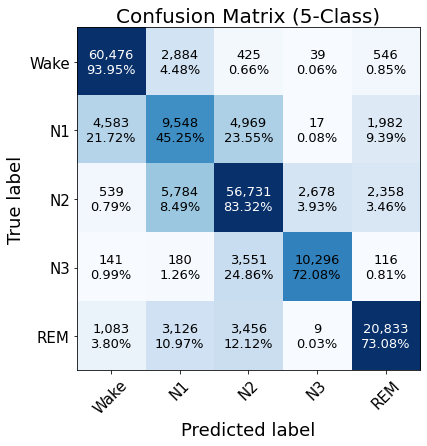

Accuracy 0.8040947288006112
Kappa 0.731865716216956
Macro F1 Score 0.7434451580047607
G Mean 0.8456238497751682
Sensitivity 0.7530613362789154
Specificity 0.9495636820793152
Class wise F1 Score [0.9219464659690857, 0.44804203510284424, 0.8268499374389648, 0.7536507844924927, 0.7667365670204163]
Class wise Sensitivity Score [0.9219464659690857, 0.44804203510284424, 0.8268499374389648, 0.7536507844924927, 0.7667365670204163]
Class wise Specificity Score [0.9699370265007019, 0.9339293241500854, 0.9107123017311096, 0.9782446026802063, 0.9549951553344727]


In [73]:
#5 Class
sens_l,spec_l,f1_l,prec_l, sens,spec,f1,prec = confusion_matrix(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels),
                                                5, labels_val_main.shape[0], print_conf_mat=True)

g = g_mean(sens, spec)

acc = accuracy(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

kap = kappa(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

print(f"Accuracy {acc}")
print(f"Kappa {kap}")
print(f"Macro F1 Score {f1}")
print(f"G Mean {g}")
print(f"Sensitivity {sens}")
print(f"Specificity {spec}")
print(f"Class wise F1 Score {f1_l}")
print(f"Class wise Sensitivity Score {f1_l}")
print(f"Class wise Specificity Score {spec_l}")

In [ ]:
#3 Class
label_3 = []
pred_3 = [] 
for i in range (main_all_pred.shape[0]):
    predss = np.argmax(main_all_pred[i], 1)
    # if predss

sens_l,spec_l,f1_l,prec_l, sens,spec,f1,prec = confusion_matrix(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels),
                                                5, labels_val_main.shape[0], print_conf_mat=True)

g = g_mean(sens, spec)

acc = accuracy(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

kap = kappa(torch.from_numpy(main_all_pred), torch.from_numpy(main_all_labels))

print(f"Accuracy {acc}")
print(f"Kappa {kap}")
print(f"Macro F1 Score {f1}")
print(f"G Mean {g}")
print(f"Sensitivity {sens}")
print(f"Specificity {spec}")
print(f"Class wise F1 Score {f1_l}")
print(f"Class wise Sensitivity Score {f1_l}")
print(f"Class wise Specificity Score {spec_l}")

# Feature Evaluation

In [22]:
val_data_loader = data.DataLoader(val_dataset, batch_size = 32, shuffle = True)

In [36]:
wake = []
s1 = []
s2 = []
s3 = []
rem = []

for batch_idx, data_input in enumerate(val_data_loader):
    eeg,eog,label = data_input
    cur_batch_size = len(eeg)
   
    eeg = torch.moveaxis(eeg,2,0)
    eog = torch.moveaxis(eeg,2,0)
    feats = test_model(eeg.float().to(device), eog.float().to(device))
    
    for i in range(len(label)):
        if label[i]==0:
            wake.append(feats[i].squeeze().detach().cpu().numpy())
        if label[i]==1:
            s1.append(feats[i].squeeze().detach().cpu().numpy())
        if label[i]==2:
            s2.append(feats[i].squeeze().detach().cpu().numpy())
        if label[i]==3:
            s3.append(feats[i].squeeze().detach().cpu().numpy())
        if label[i]==4:
            rem.append(feats[i].squeeze().detach().cpu().numpy())

wake = np.array(wake)
s1 = np.array(s1)
s2 = np.array(s2)
s3 = np.array(s3)
rem = np.array(rem)  

print(wake.shape, s1.shape,s2.shape,s3.shape,rem.shape)
    

(12530, 512) (4269, 512) (12995, 512) (2225, 512) (4638, 512)


In [37]:
from sklearn.manifold import TSNE
features = np.concatenate((wake,s1,s2,s3,rem), axis= 0)
features = features.squeeze()
print(features.shape)
tsne = TSNE(n_components=2).fit_transform(features)
print(tsne.shape)

(36657, 512)
(36657, 2)


In [38]:
def scale_to_01_range(x):
  value_range = (np.max(x) - np.min(x))

  starts_from_zero = x - np.min(x)

  return starts_from_zero / value_range

tx = tsne[:, 0]
ty = tsne[:, 1]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

0 12530 32019 36657


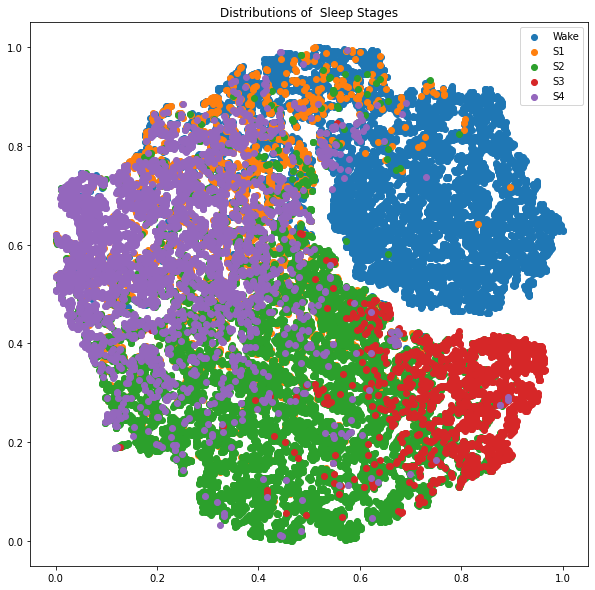

(12530,) (4269,) (12995,)


In [39]:
# initialize a matplotlib plot
fig = plt.figure(figsize = (10,10))

# valset 5 (12530, 512) (4269, 512) (12995, 512) (2225, 512) (4638, 512)

w_start, w_end = 0,12530
s1_start,s1_end = w_end,w_end+4269
s2_start,s2_end = s1_end,s1_end+12995
s3_start,s3_end = s2_end,s2_end+2225
rem_start,rem_end = s3_end,s3_end+4638
print(w_start, w_end,rem_start,rem_end)
plt.scatter(tx[w_start:w_end], ty[w_start:w_end], label = "Wake" )
plt.scatter(tx[s1_start:s1_end], ty[s1_start:s1_end], label = "S1" )
plt.scatter(tx[s2_start:s2_end], ty[s2_start:s2_end], label = "S2" )
plt.scatter(tx[s3_start:s3_end], ty[s3_start:s3_end], label = "S3" )
plt.scatter(tx[rem_start:], ty[rem_start:], label = "S4" )
plt.legend(loc='best')
plt.title("Distributions of  Sleep Stages")

# finally, show the plot
plt.show()

print(tx[w_start:w_end].shape,tx[s1_start:s1_end].shape,tx[s2_start:s2_end].shape)

# Interpretation

In [60]:
val_test_loader = data.DataLoader(val_dataset, batch_size = 2, shuffle = False)

In [33]:
W_corrrect_pred = []
N1_corrrect_pred = []
N2_corrrect_pred = []
N3_corrrect_pred = []
REM_corrrect_pred = []
with torch.no_grad():
    test_model.eval()
    for batch_val_idx, data_val in enumerate(val_test_loader):
        val_eeg,val_eog, val_labels = data_val
        cur_val_batch_size = len(val_eeg)
        pred,_,_ = test_model(val_eeg.float().to(device), val_eog.float().to(device))
        
        for i in range(2):
            # print(i)
            if accuracy(pred[i,:].cpu().view(1,5), val_labels[i].view(1,)) > 0.8:
                if val_labels[i] == 0:
                    W_corrrect_pred.append([batch_val_idx,pred[i].cpu(),val_labels[i]])
                if val_labels[i] == 1:
                    N1_corrrect_pred.append([batch_val_idx,pred[i].cpu(),val_labels[i]])
                if val_labels[i] == 2:
                    N2_corrrect_pred.append([batch_val_idx,pred[i].cpu(),val_labels[i]])
                if val_labels[i] == 3:
                    N3_corrrect_pred.append([batch_val_idx,pred[i].cpu(),val_labels[i]])
                if val_labels[i] == 4:
                    REM_corrrect_pred.append([batch_val_idx,pred[i].cpu(),val_labels[i]])
            

                                                    

NameError: name 'val_test_loader' is not defined

In [ ]:
N3_corrrect_pred

[[55, tensor([-3.1220, -0.3104,  3.1078,  3.1695, -4.3973]), tensor(3)],
 [55, tensor([-4.7131, -0.7952,  3.7836,  4.3082, -3.9923]), tensor(3)],
 [56, tensor([-5.1733, -1.0782,  4.0330,  5.7264, -4.1921]), tensor(3)],
 [56, tensor([-4.9426, -1.0226,  3.5361,  6.1372, -3.9696]), tensor(3)],
 [57, tensor([-4.9635, -1.0222,  3.8006,  5.1721, -3.8929]), tensor(3)],
 [57, tensor([-5.4907, -1.1928,  4.3493,  4.8076, -3.7928]), tensor(3)],
 [58, tensor([-4.3034, -0.9683,  3.2990,  5.7366, -4.0854]), tensor(3)],
 [59, tensor([-5.6868, -1.5309,  4.2053,  6.3275, -3.6711]), tensor(3)],
 [60, tensor([-5.6470, -1.4100,  4.5188,  4.6756, -3.4998]), tensor(3)],
 [60, tensor([-4.2252, -1.5959,  3.9270,  6.6813, -4.4633]), tensor(3)],
 [61, tensor([-4.5514, -1.2938,  3.6022,  6.2095, -4.0283]), tensor(3)],
 [61, tensor([-4.8508, -1.8252,  3.5107,  7.2778, -3.2998]), tensor(3)],
 [62, tensor([-4.4366, -1.1997,  3.3880,  6.1910, -3.9359]), tensor(3)],
 [62, tensor([-4.8742, -1.8893,  3.9877,  7.2800, -

torch.Size([2, 1, 1, 3000]) torch.Size([2, 1, 1, 3000]) torch.Size([2]) 3
torch.Size([120])
torch.Size([120])
(120,) (120,)
(3000,)


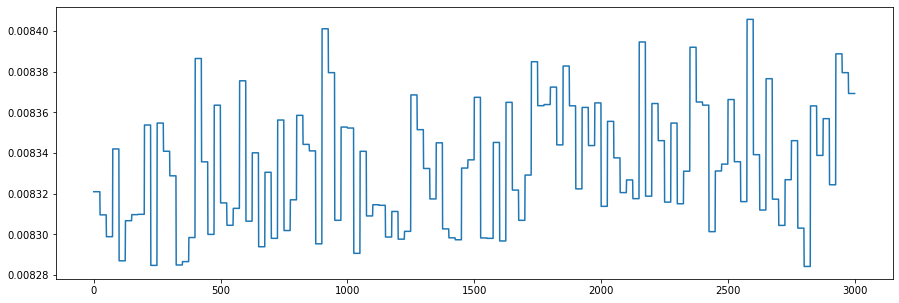

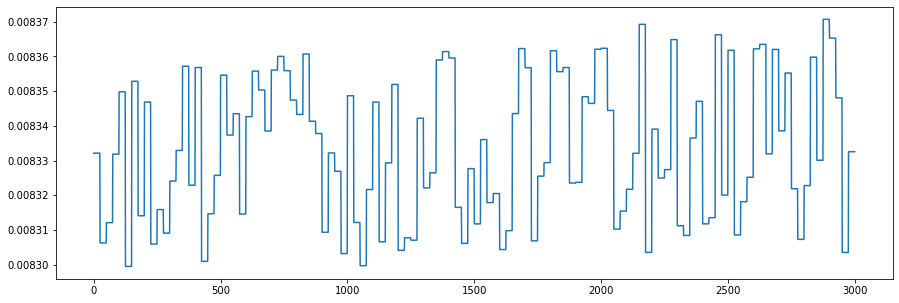

(3000,)
(3000,)


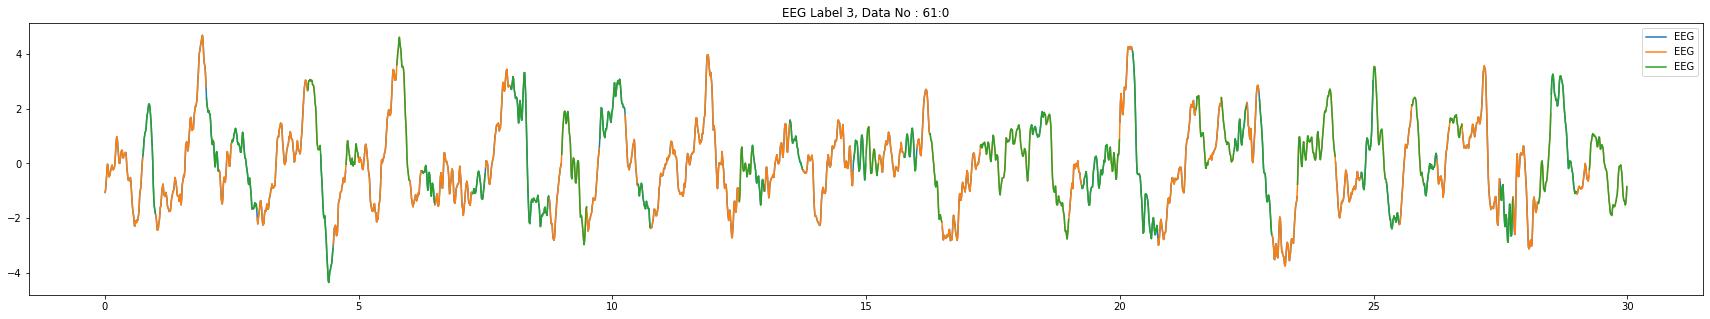

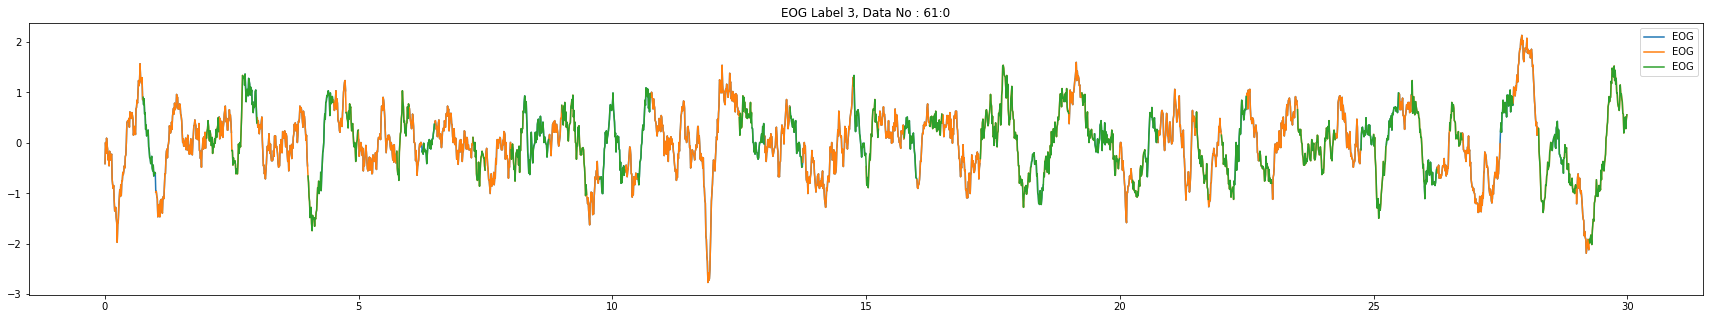

torch.Size([120])
torch.Size([120])
(120,) (120,)
(3000,)


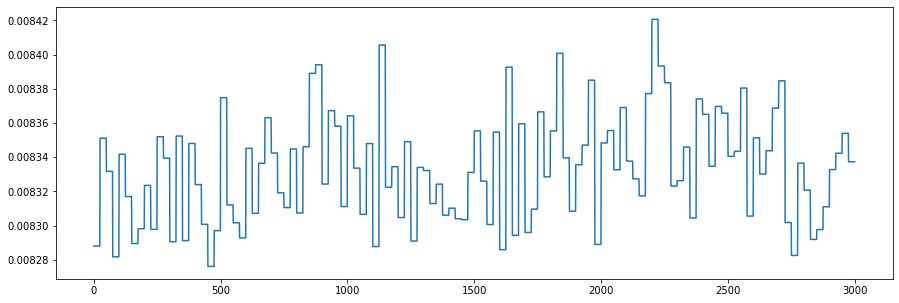

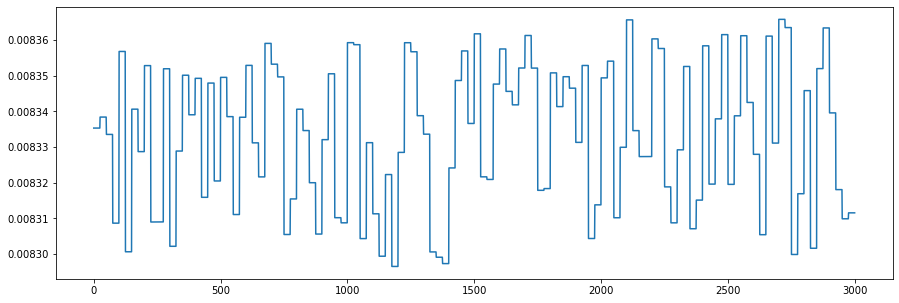

(3000,)
(3000,)


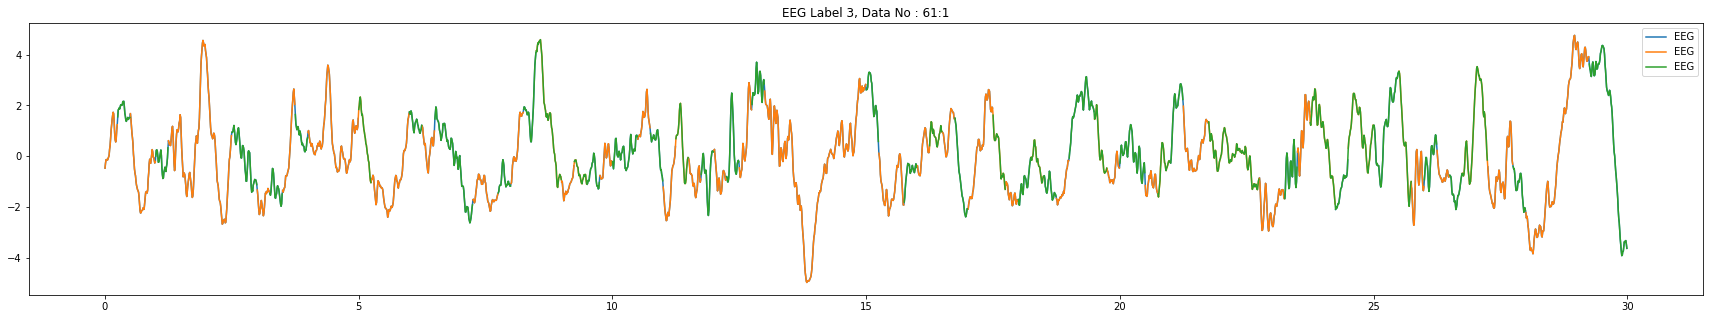

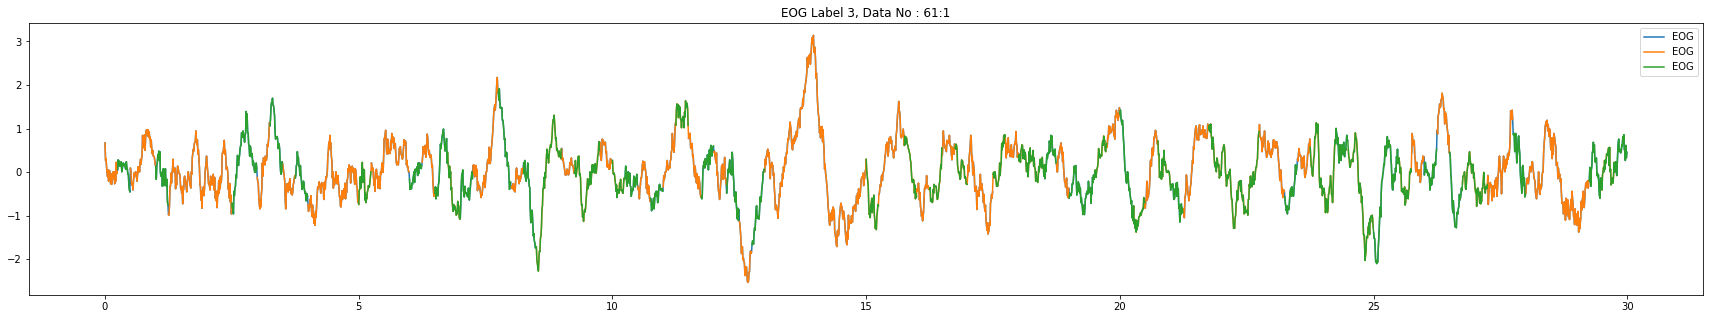

In [192]:
#feat_list = [cross_cls,ff_eeg,ff_eog]
import matplotlib.colors as mcolors
with torch.no_grad():
    test_model.eval()
    for batch_val_idx, data_val in enumerate(val_test_loader):
        val_eeg,val_eog, val_labels = data_val
        cur_val_batch_size = len(val_eeg)
        pred,_,feat_list = test_model(val_eeg.float().to(device), val_eog.float().to(device))

        if batch_val_idx == 61:  #N2  41, #N3 61   #REM 90
            print(val_eeg.shape,val_eog.shape, val_labels.shape,len(feat_list))
            for i in range (2):
                feats = torch.mean(feat_list[1][i][1:],dim = 1)#.detach().cpu().numpy()
                print(feats.shape)
                m = nn.Softmax()
                feats = m(feats).detach().cpu().numpy()

                feats_eog = torch.mean(feat_list[2][i][1:],dim = 1)#.detach().cpu().numpy()
                print(feats_eog.shape)
                m = nn.Softmax()
                feats_eog = m(feats_eog).detach().cpu().numpy()
                # feats = np.mean(feats,axis = 1)
                print(feats.shape,feats_eog.shape)
                feats2 = np.zeros((3000,))
                feats2_eog = np.zeros((3000,))
                for k in range(120):
                    feats2[k*25:(k+1)*25] = feats[k]
                    feats2_eog[k*25:(k+1)*25] = feats_eog[k]
                print(feats2.shape)

                plt.figure(figsize = (15,5))
                plt.plot(feats2)
                plt.show()

                plt.figure(figsize = (15,5))
                plt.plot(feats2_eog)
                plt.show()
                
                ##### EEG ###################
                eeg = val_eeg[i].squeeze().detach().cpu().numpy()
                print(eeg.shape)
                thresh = feats2.mean()
                std_feat2 =  feats2.std()
                # eeg_up1 = np.ma.masked_where(feats2 >= 0.00836, eeg)
                # eeg_up2 = np.ma.masked_where((feats2 < 0.00834) & (feats2 > 0.00832), eeg)
                # eeg_up3 = np.ma.masked_where(feats2 < 0.00832, eeg)
                
                eeg_up1 = np.ma.masked_where(feats2 >= thresh+std_feat2, eeg)
                eeg_up2 = np.ma.masked_where((feats2 < thresh+std_feat2) & (feats2 >=thresh), eeg)
                eeg_up3 = np.ma.masked_where(feats2 < thresh, eeg)

                #### EOG##################
                eog = val_eog[i].squeeze().detach().cpu().numpy()
                print(eog.shape)
                thresh = feats2_eog.mean()
                std_feat2 =  feats2_eog.std()
                # eeg_up1 = np.ma.masked_where(feats2 >= 0.00836, eeg)
                # eeg_up2 = np.ma.masked_where((feats2 < 0.00834) & (feats2 > 0.00832), eeg)
                # eeg_up3 = np.ma.masked_where(feats2 < 0.00832, eeg)
                
                eog_up1 = np.ma.masked_where(feats2 >= thresh+std_feat2, eog)
                eog_up2 = np.ma.masked_where((feats2 < thresh+std_feat2) & (feats2 >=thresh), eog)
                eog_up3 = np.ma.masked_where(feats2 < thresh, eog)
            



             

                

                t = np.arange(0,30,1/100)
                plt.figure(figsize = (30,5))
                plt.plot(t,eeg_up1,t,eeg_up2,t,eeg_up3,label="EEG")
                plt.title(f"EEG Label {val_labels[i].squeeze()}, Data No : {batch_val_idx}:{i}")
                plt.legend()
                plt.show()

                t = np.arange(0,30,1/100)
                plt.figure(figsize = (30,5))
                plt.plot(t,eog_up1,t,eog_up2,t,eog_up3,label="EOG")
                plt.title(f"EOG Label {val_labels[i].squeeze()}, Data No : {batch_val_idx}:{i}")
                plt.legend()
                plt.show()
                # break
            break

In [172]:
feats2.mean()-feats2.std()*1


0.008307585570234255

In [174]:
thresh

0.008333333496314784

In [117]:
feats2[np.logical_and(feats2<0.00836,feats2>=0.00834)]

array([0.00834549, 0.00834549, 0.00834549, 0.00834549, 0.00834549,
       0.00834549, 0.00834549, 0.00834549, 0.00834549, 0.00834549,
       0.00834549, 0.00834549, 0.00834549, 0.00834549, 0.00834549,
       0.00834549, 0.00834549, 0.00834549, 0.00834549, 0.00834549,
       0.00834549, 0.00834549, 0.00834549, 0.00834549, 0.00834549,
       0.00835896, 0.00835896, 0.00835896, 0.00835896, 0.00835896,
       0.00835896, 0.00835896, 0.00835896, 0.00835896, 0.00835896,
       0.00835896, 0.00835896, 0.00835896, 0.00835896, 0.00835896,
       0.00835896, 0.00835896, 0.00835896, 0.00835896, 0.00835896,
       0.00835896, 0.00835896, 0.00835896, 0.00835896, 0.00835896,
       0.00835584, 0.00835584, 0.00835584, 0.00835584, 0.00835584,
       0.00835584, 0.00835584, 0.00835584, 0.00835584, 0.00835584,
       0.00835584, 0.00835584, 0.00835584, 0.00835584, 0.00835584,
       0.00835584, 0.00835584, 0.00835584, 0.00835584, 0.00835584,
       0.00835584, 0.00835584, 0.00835584, 0.00835584, 0.00835